In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('/content/bank-marketing.csv', sep=';')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [41]:
feature_cols = ['age', 'default', 'cons.price.idx', 'cons.conf.idx']

In [42]:
X = df[feature_cols]
y = df['y']

In [43]:
X.head()

,age,default,cons.price.idx,cons.conf.idx
0,56,no,93.994,-36.4
1,57,unknown,93.994,-36.4
2,37,no,93.994,-36.4
3,40,no,93.994,-36.4
4,56,no,93.994,-36.4


In [44]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [45]:
X['default'] = X['default'].map({'no':0, 'unknown':0, 'yes':1})
y = y.map({'no':0, 'yes':1})

<ipython-input-45-318f02ab6236>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['default'] = X['default'].map({'no':0, 'unknown':0, 'yes':1})


In [46]:
X.head()

,age,default,cons.price.idx,cons.conf.idx
0,56,0,93.994,-36.4
1,57,0,93.994,-36.4
2,37,0,93.994,-36.4
3,40,0,93.994,-36.4
4,56,0,93.994,-36.4


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
for i in X_train, X_test, y_train, y_test:
    print(len(i))

32950
8238
32950
8238


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
y_pred = rf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_pred, y_test)

0.8897790725904345

In [56]:
type(rf.estimators_)

list

In [57]:
type(rf.estimators_[0])

sklearn.tree._classes.DecisionTreeClassifier

In [58]:
len(rf.estimators_)

100

In [59]:
from sklearn.tree import export_graphviz
import graphviz

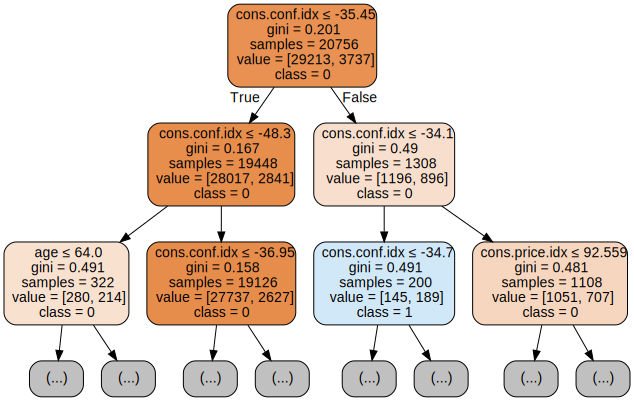

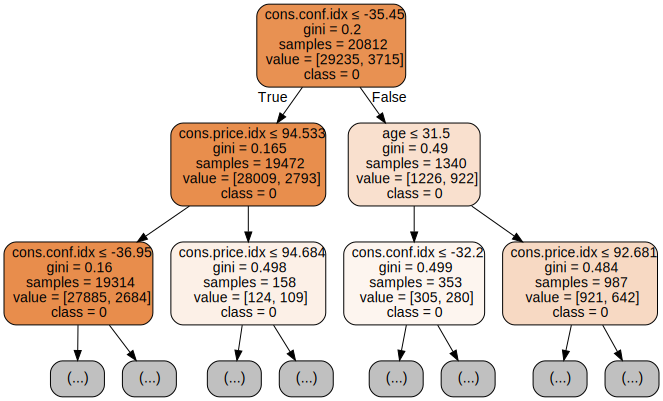

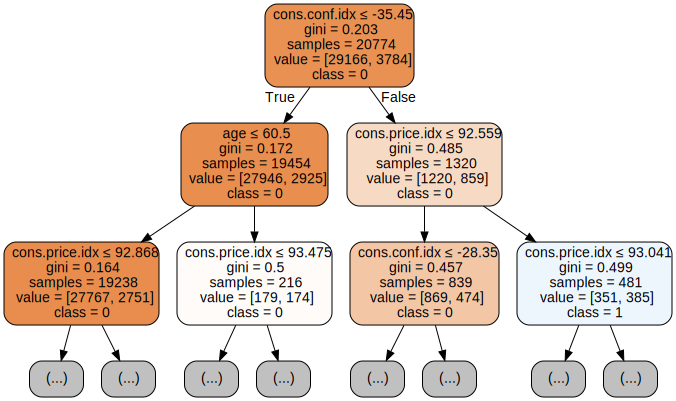

In [60]:
for tree in rf.estimators_[:3]:
    ddata = export_graphviz(tree, out_file=None, max_depth=2, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(ddata)
    display(graph)

In [76]:
from scipy.stats import randint

In [77]:
ne = np.random.randint(5, 200, 100)
md = np.random.randint(3, 20, 20)
param_dist = {'n_estimators': ne, 'max_depth': md}

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=15, cv=5, verbose=3)

In [80]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END ....max_depth=17, n_estimators=152;, score=0.888 total time=   3.0s
[CV 2/5] END ....max_depth=17, n_estimators=152;, score=0.882 total time=   2.2s
[CV 3/5] END ....max_depth=17, n_estimators=152;, score=0.887 total time=   2.2s
[CV 4/5] END ....max_depth=17, n_estimators=152;, score=0.888 total time=   2.3s
[CV 5/5] END ....max_depth=17, n_estimators=152;, score=0.888 total time=   2.3s
[CV 1/5] END .....max_depth=6, n_estimators=171;, score=0.889 total time=   2.5s
[CV 2/5] END .....max_depth=6, n_estimators=171;, score=0.889 total time=   1.5s
[CV 3/5] END .....max_depth=6, n_estimators=171;, score=0.889 total time=   1.6s
[CV 4/5] END .....max_depth=6, n_estimators=171;, score=0.888 total time=   1.6s
[CV 5/5] END .....max_depth=6, n_estimators=171;, score=0.886 total time=   1.5s
[CV 1/5] END ....max_depth=15, n_estimators=136;, score=0.887 total time=   1.9s
[CV 2/5] END ....max_depth=15, n_estimators=136;

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': array([ 8, 12,  8, 14, 17, 15, 14,  9, 13, 15, 15,  6, 10,  5, 17, 13,  6,
       15, 15, 11]),
                                        'n_estimators': array([188, 155, 152, 119,  72,  95, 140,  12, 127, 169,  37, 152,  57,
        45,  66,   7, 161, 111, 154,  58,  67, 163, 157, 171,  66,  62,
       182, 145,   6,  83, 194,  93, 162,  76,  70,  62, 177,  81,  89,
        40, 112, 181, 105, 120, 193,  45,  19, 177,  86,  46, 183, 128,
       175, 136, 130,  87,  84, 155, 169, 170,  17,  46,  82,   8,  50,
       162,  18,  98, 133, 163,   8, 190,  16, 181,  66, 128, 122, 133,
        38, 155,  18, 133, 193,  24,  41, 149,  79, 136, 167, 175, 166,
       130, 198,  22, 158,  78,  74, 122, 118,  59])},
                   verbose=3)

In [81]:
random_search.best_estimator_

RandomForestClassifier(max_depth=6, n_estimators=171)

In [82]:
y_pred = random_search.best_estimator_.predict(X_test)

In [83]:
accuracy_score(y_pred, y_test)

0.8926924010682205